In [1]:
import numpy as np
import numpy

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import tree

In [3]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.head()
df1=df.copy()
df2=df.copy()

In [5]:
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [7]:
from pandas.core.dtypes.common import is_numeric_dtype

for i in df1.columns:
  if is_numeric_dtype(df1[i]):
    continue
  else:
    df1[i]=le.fit_transform(df1[i])

In [8]:
df1

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


# Seperation

In [9]:
y=df1['DEATH_EVENT']
x=df1.drop('DEATH_EVENT',axis=1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

In [12]:
ytest.shape

(90,)

In [13]:
xtrain.shape

(209, 12)

# Apply Decision Tree Classifier


In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier()

In [16]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [17]:
pred = dt.predict(xtest)

In [18]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [19]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [20]:
dt.score(xtest,ytest)

0.6333333333333333

# Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf = RandomForestClassifier() # default n_estimators=100 ; 100 trees


In [23]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [24]:
clf.score(xtest, ytest)

0.7777777777777778

# Tuning Random Forest using Randomized Search CV

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
#Assign Parameters
n_estimators = numpy.random.randint(15,200,40)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = numpy.random.randint(1,10,20)
min_samples_split = numpy.random.randint(1,10,15) #[1,2,3,4]
min_samples_leaf= numpy.random.randint(1,4,15)  #[ 1,2,3,4]

parameters = {
    'n_estimators'  : n_estimators,
    'criterion' : criterion,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [27]:
print(parameters)

{'n_estimators': array([ 17, 164, 190, 126,  85,  91,  33, 136, 116,  99, 121, 120, 134,
       155, 131,  30, 185, 131, 139, 158,  52,  55, 196, 118, 148,  73,
       121, 152,  81, 197, 134, 189, 192, 199, 185,  73, 103,  83,  74,
        46]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([3, 1, 2, 7, 9, 9, 7, 4, 5, 4, 8, 1, 3, 3, 4, 7, 4, 2, 8, 6]), 'min_samples_split': array([7, 2, 4, 3, 8, 4, 8, 7, 5, 5, 7, 4, 6, 2, 2]), 'min_samples_leaf': array([3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 1])}


In [28]:
random_forest = RandomForestClassifier()

In [29]:
r = RandomizedSearchCV(random_forest , parameters, n_iter = 300, cv = 3) #cv = cross validation , clf=RandomForestClassifier()

In [30]:
import warnings
warnings.filterwarnings('ignore')




In [64]:
r.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([3, 1, 2, 7, 9, 9, 7, 4, 5, 4, 8, 1, 3, 3, 4, 7, 4, 2, 8, 6]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 1]),
                                        'min_samples_split': array([7, 2, 4, 3, 8, 4, 8, 7, 5, 5, 7, 4, 6, 2, 2]),
                                        'n_estimators': array([ 17, 164, 190, 126,  85,  91,  33, 136, 116,  99, 121, 120, 134,
       155, 131,  30, 185, 131, 139, 158,  52,  55, 196, 118, 148,  73,
       121, 152,  81, 197, 134, 189, 192, 199, 185,  73, 103,  83,  74,
        46])})

In [33]:
r.cv_results_

{'mean_fit_time': array([0.07906691, 0.05691671, 0.05085937, 0.05296437, 0.09153628,
        0.05372008, 0.13396621, 0.05813742, 0.05170457, 0.06662512,
        0.12193187, 0.05188258, 0.07810736, 0.08304564, 0.07947779,
        0.07457328, 0.05120158, 0.04689487, 0.04582858, 0.02008192,
        0.11548869, 0.08130423, 0.06557425, 0.08781155, 0.12291439,
        0.04814879, 0.09994078, 0.05448437, 0.0881393 , 0.05968674,
        0.03361845, 0.07203364, 0.05182807, 0.05395293, 0.08358502,
        0.06976589, 0.01362093, 0.13455089, 0.09713507, 0.07867463,
        0.03336231, 0.09881965, 0.08570147, 0.07888381, 0.03406843,
        0.05926331, 0.08492708, 0.11605318, 0.09002988, 0.09284647,
        0.02948292, 0.11843991, 0.12432655, 0.12342668, 0.03447946,
        0.05214914, 0.07783246, 0.08558798, 0.12830981, 0.1365416 ,
        0.03654353, 0.08966184, 0.09595275, 0.05846914, 0.07890399,
        0.05827347, 0.03305109, 0.04832363, 0.09105118, 0.08260258,
        0.03720951, 0.03488382,

In [67]:
r.best_score_

0.8945479641131815

In [68]:
new_r = r.best_estimator_

In [113]:
new_r

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=152)

In [116]:
new_r.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=4,
                       n_estimators=152)

In [117]:
new_r.score(xtest, ytest)

0.7777777777777778

# Grid Search CV


In [39]:

from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = { 
    'n_estimators': [15, 200, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7],
    'criterion' :['gini', 'entropy'],
}

In [41]:
print(param_grid)

{'n_estimators': [15, 200, 40], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}


In [51]:
rf_1 = RandomForestClassifier()


In [52]:
rf_1

RandomForestClassifier()

In [53]:

rf_2 = GridSearchCV(rf_1, param_grid, cv = 3)

In [54]:
import warnings
warnings.filterwarnings('ignore')
rf_2.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [15, 200, 40]})

In [55]:
rf_2.best_score_

0.8897860593512767

In [56]:
new_rf_2 = rf_2.best_estimator_ 
new_rf_2

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       n_estimators=40)

In [61]:

new_rf_2.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='sqrt',
                       n_estimators=40)

In [63]:
new_rf_2.score(xtest, ytest)

0.8

# Accuracy Comparison


In [122]:
Decision_Tree = "Decision Tree"
Random_Forest = "Random Forest"
RandomizedSearchCV = "Random Forest using RandomizedSearchCV"
Random_Forest_using_GridSearchCV = " Random Forest using GridSearchCV"
df=pd.DataFrame([[Decision_Tree,0.6333333333333333],[Random_Forest, 0.7777777777777778],  [RandomizedSearchCV, 0.7777777777777778], [Random_Forest_using_GridSearchCV, 0.8]],
                 columns=['Accuracy', 'Value'])

In [123]:
df

,Accuracy,Value
0,Decision Tree,0.633333
1,Random Forest,0.777778
2,Random Forest using RandomizedSearchCV,0.777778
3,Random Forest using GridSearchCV,0.800000


<AxesSubplot:xlabel='Value', ylabel='Accuracy'>

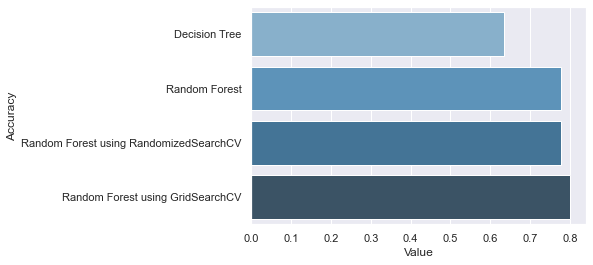

In [134]:
sns.set()
sns.barplot(x="Value", y="Accuracy", data=df,
                 palette="Blues_d")